In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import set_printoptions
from sklearn.preprocessing import Normalizer
import os, types
import pandas as pd
#from botocore.client import Config
#import ibm_boto3
import streamlit as st



from pandas.plotting import table
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
%matplotlib inline
import math

#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#import statsmodels.tools.eval_measures as ev
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from scipy.special import boxcox, inv_boxcox



df_data_1 =  pd.read_csv("Ann.csv")
df_data_1.head()


In [2]:
df_data_3 = df_data_1.drop('Case ID', 1)
df_data_3.head()

C:\Users\ODEGBESAN\AppData\Local\Temp\ipykernel_18552\2956387741.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_data_3 = df_data_1.drop('Case ID', 1)


,Corruption,Finance,ICT,Location,Pow,Sus
0,-0.588,1.146,3.096,-0.138,1.261,2.011
1,-0.588,1.146,-1.436,-0.138,-0.686,0.662
2,1.274,1.146,-0.303,2.388,-1.094,0.939
3,0.343,1.146,-0.303,1.125,-0.013,2.011
4,1.274,1.146,0.373,2.388,-0.013,0.939


In [3]:
print(df_data_3.describe())

        Corruption      Finance          ICT     Location          Pow  \
count  1065.000000  1065.000000  1065.000000  1065.000000  1065.000000   
mean     -0.000045    -0.000038    -0.000012     0.000016    -0.000041   
std       1.000530     1.000517     1.000400     1.000493     1.000522   
min      -1.519000    -1.433000    -1.436000    -1.401000    -1.370000   
25%      -0.716000    -0.774000    -0.760000    -0.672000    -0.770000   
50%      -0.119000    -0.143000    -0.280000    -0.138000    -0.024000   
75%       0.470000     0.586000     0.812000     0.610000     0.709000   
max       2.205000     3.725000     3.096000     3.651000     4.060000   

               Sus  
count  1065.000000  
mean      0.000020  
std       1.000469  
min      -1.771000  
25%      -0.704000  
50%      -0.042000  
75%       0.656000  
max       4.701000  


In [4]:
print(df_data_3.columns)

Index(['Corruption', 'Finance', 'ICT', 'Location', 'Pow', 'Sus'], dtype='object')


In [5]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Corruption  1065 non-null   float64
 1   Finance     1065 non-null   float64
 2   ICT         1065 non-null   float64
 3   Location    1065 non-null   float64
 4   Pow         1065 non-null   float64
 5   Sus         1065 non-null   float64
dtypes: float64(6)
memory usage: 50.0 KB


In [6]:
print(f'Dataset size: {df_data_3.shape}')

Dataset size: (1065, 6)


In [7]:
df_data_3.isnull().sum().sort_values(ascending=False)/df_data_3.shape[0]

Corruption    0.0
Finance       0.0
ICT           0.0
Location      0.0
Pow           0.0
Sus           0.0
dtype: float64

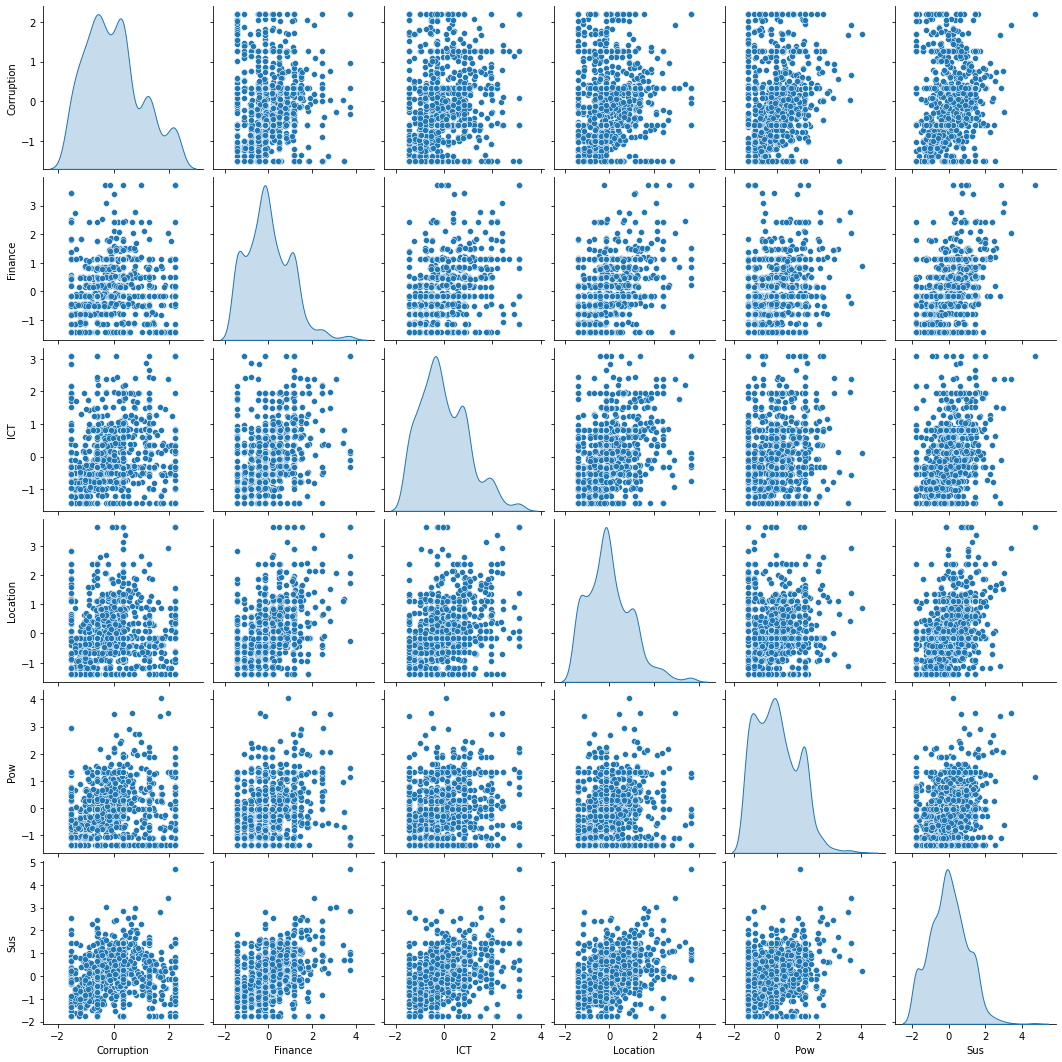

In [8]:
sns.pairplot(data=df_data_3, diag_kind='kde')

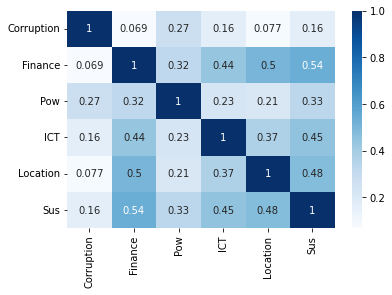

In [9]:
sns.heatmap(df_data_3[['Corruption', 'Finance', 'Pow', 'ICT','Location','Sus']].corr(), cmap='Blues', annot=True)
plt.show()

In [10]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
df_data_4 = min_max_scaling(df_data_3)

df_data_4

,Corruption,Finance,ICT,Location,Pow,Sus
0,0.25,0.500000,1.000000,0.250000,0.484530,0.584363
1,0.25,0.500000,0.000000,0.250000,0.125967,0.375927
2,0.75,0.500000,0.250000,0.750000,0.050829,0.418727
3,0.50,0.500000,0.250000,0.500000,0.249908,0.584363
4,0.75,0.500000,0.399162,0.750000,0.249908,0.418727
...,...,...,...,...,...,...
1060,0.00,0.000000,0.000000,0.046318,0.000000,0.000000
1061,0.50,0.440869,0.452118,0.500000,0.309761,0.312886
1062,0.50,0.495347,0.545896,0.547110,0.500000,0.415019
1063,0.00,0.000000,0.201677,0.370150,0.212155,0.062886


In [11]:
x = df_data_4[['Corruption', 'Finance', 'ICT', 'Location','Pow']]
y = df_data_4['Sus']

In [12]:
#from sklearn import preprocessing
#print("Scale all the columns successfully done") 
#X_scaled = preprocessing.scale(x)
#X_scaled = pd.DataFrame(X_scaled, columns=x.columns)


In [13]:
#print("Scale all the columns successfully done")
#y_scaled = preprocessing.scale(y)
#y_scaledd = pd.DataFrame(y_scaled, columns=y.columns)

In [14]:
#from sklearn import preprocessing
#print("Scale all the columns successfully done") 
#X_scaled = preprocessing.scale(x)
#X_scaled = pd.DataFrame(X_scaled, columns=x.columns)
#y_scaled = preprocessing.scale(y)
#y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [15]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=100)
#print("Training and testing split was succesful")

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 100)
print("Training and testing split was succesful")

Training and testing split was succesful


In [17]:
#Fitting the Multiple Linear Regression model
from sklearn import ensemble

#mlr = LinearRegression()  
mlr = ensemble.GradientBoostingRegressor(n_estimators = 50, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss ='ls' )
mlr.fit(x_train, y_train)
#for idcoff, columnname in enumerate(X_train.columns):
    #print("The coefficient for {} is {}".format(columnname, mlr.coef_[0][idcoff]))


C:\Users\ODEGBESAN\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=50)

In [18]:
intercept = mlr.intercept_[0]
print("The intercept for our model is {}".format(intercept))

AttributeError: 'GradientBoostingRegressor' object has no attribute 'intercept_'

In [19]:
#Intercept and Coefficient
#print("Intercept: ", mlr.intercept_)
print(mlr.coef_)
#list(zip(x, mlr.coef_))

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

In [20]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.36068728 0.29553804 0.39728402 0.12038956 0.28250329 0.2749185
 0.12223559 0.25903297 0.27082769 0.11121498 0.31335485 0.16318743
 0.08365807 0.17511585 0.11701247 0.11040185 0.42133755 0.25390887
 0.32931231 0.1399392  0.16631068 0.34778449 0.32137475 0.06967982
 0.13052516 0.27945627 0.28391443 0.09405527 0.21067168 0.16567789
 0.34932536 0.48767393 0.27226191 0.25920785 0.30808512 0.32900461
 0.32097084 0.2377738  0.3184603  0.31743571 0.31997708 0.3937252
 0.33715323 0.2389853  0.25563142 0.27353616 0.14952883 0.1173089
 0.19223057 0.29548584 0.38159375 0.15705472 0.41615501 0.45305307
 0.40924287 0.29475087 0.31639435 0.25219769 0.27748781 0.01316498
 0.3442892  0.31681417 0.13242564 0.31437815 0.19725612 0.25987068
 0.47422132 0.33999339 0.47422132 0.08365807 0.3629452  0.36314589
 0.06784494 0.29947193 0.36439441 0.31603349 0.24693114 0.16612634
 0.29063626 0.25219769 0.34080605 0.37255824 0.22595919 0.26502233
 0.465665   0.19657842 0.19984008 0.2472

In [21]:
expected_y  = y_test

In [22]:
mlr_diff = pd.DataFrame({'Actual value': expected_y, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
288,0.430779,0.360687
987,0.226360,0.295538
173,0.742738,0.397284
714,0.062577,0.120390
700,0.328956,0.282503


In [23]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 74.99
Mean Absolute Error: 0.07088223892426793
Mean Square Error: 0.009420176528761415
Root Mean Square Error: 0.09705759387477837


C:\Users\ODEGBESAN\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sus'>

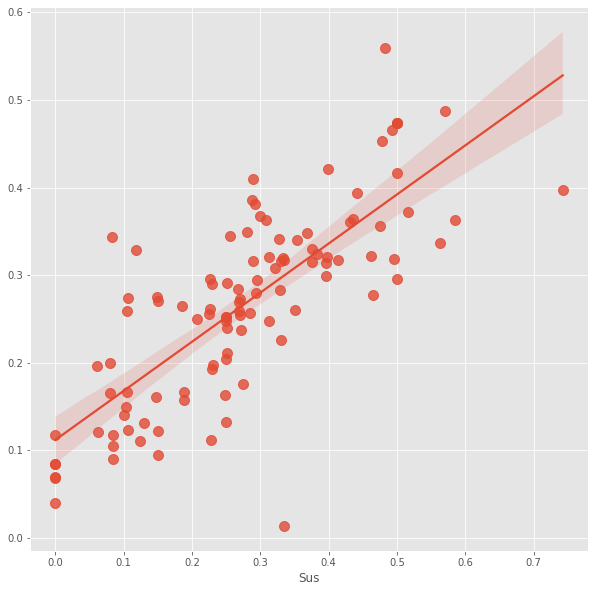

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
sns.regplot(expected_y, y_pred_mlr, fit_reg=True, scatter_kws={"s": 100})

In [25]:
print(mlr.score(x_train,y_train))
print(mlr.score(x_test,expected_y))

0.7668899132682194
0.5910119203660577


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
#init_func = LGBMRegressor

#generic function to fit model and return metrics for every algorithm
def boost_models(xq):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=xq, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(x_train, y_train)
    yhat = regr_trans.predict(x_test)
    algoname= xq.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

C:\Users\ODEGBESAN\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


NameError: name 'x_train' is not defined

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(x_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(x_train, y_train)
yhat = regr_trans.predict(x_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

C:\Users\ODEGBESAN\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (958). n_quantiles is set to n_samples.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\ODEGBESAN\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.26}


C:\Users\ODEGBESAN\miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (958). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ODEGBESAN\miniconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


(0.454282441085039, 0.08063591298011082, 0.11211356419710387)

In [23]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [35]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [0.02901252 0.22603184 0.13570609 0.17645111 0.10708844]


In [36]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [0. 0. 0. 0. 0.]


In [37]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.3861549662178967
0.5819615503095229


In [38]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.0
-0.0006449407379096606


In [26]:

!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(mlr, pickle_out) 
pickle_out.close()

In [27]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()

Overwriting app.py


In [32]:
%%writefile app.py
from sklearn import metrics
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()

def prediction(corruption, finance, location, ict, pow):   
 
    # Pre-processing user input    
    
    input_data_2 = [[corruption, finance, location, ict, pow]]
    scaler = MinMaxScaler()
    input_data_1 =scaler.fit_transform(input_data_2)
    input_data = scaler.transform(input_data_1)
 
    # Making predictions 
    prediction = classifier.predict(input_data)
    
    #Predicted values
     
    if prediction < 0.5:
        pred = 'Not Sustainable'
    else:
        pred = 'Sustaianble'
    return (pred, prediction)


# this is the main function in which we define our webpage  

def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Business Sustainability Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Name = st.text_input("Name of Business")
    #sex = st.selectbox("Sex",options=['Male' , 'Female'])
    corruption = st.slider("Corruption", -1.519, 2.205, 0.1)
    finance = st.slider("Finance", -1.433, 3.725, 0.1)
    location = st.slider("Location", -1.436, 3.096, 0.1)
    ict = st.slider("ICT", -1.401, 3.651, 0.1 )
    pow = st.slider("Pow", -1.37, 4.06, 0.1)
    #sus = st.slider("Sus", -1.771, 4.701,0.1)

    
    #Gender = st.selectbox('Gender',("Male","Female"))
    #Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    #ApplicantIncome = st.number_input("Applicants monthly income") 
    #LoanAmount = st.number_input("Total loan amount")
    #Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    #result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result, result1= prediction(corruption, finance, location, ict, pow)
        st.success('Your Business is {}'.format(result))
        st.success('Your Business is {}'.format(result1*100))
        st.write(Name, 'Your Business is', result1*100)
        #print("Prediction for test set: {}".format(prediction))
        #print(prediction)%
     
if __name__=='__main__': 
    main()

Overwriting app.py


In [33]:
!streamlit run app.py 

from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

^C


2022-03-06 06:57:54.064 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-8e11f827-9d40-456c-83a6-06efc6672241
2022-03-06 06:57:54.079 INFO    pyngrok.process.ngrok: t=2022-03-06T06:57:54+0100 lvl=info msg=start pg=/api/tunnels id=10d43f08e9c54f07
2022-03-06 06:57:54.566 WARNING pyngrok.process.ngrok: t=2022-03-06T06:57:54+0100 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=10d43f08e9c54f07 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_25zuhPkTH9tFcWq73WK4lfmGnCt, tn_25zuhSjcazZzbMzt4CUnxfFa8eE\n\r\n\r\nERR_NGROK_324\r\n"
2022-03-06 06:57:54.575 INFO    pyngrok.process.ngrok: t=2022-03-06T06:57:54+0100 lvl=info msg=end pg=/api/tunnels id=10d43f08e9c54f07 status=502 dur=486.1403ms


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\ntn_25zuhPkTH9tFcWq73WK4lfmGnCt, tn_25zuhSjcazZzbMzt4CUnxfFa8eE\n\r\n\r\nERR_NGROK_324\r\n"}}


2022-03-06 08:09:30.939 ERROR   pyngrok.process.ngrok: t=2022-03-06T08:09:30+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=7b4ce7e9f3f5 clientid=cb8052f74354e81d2884fa2445f674be
2022-03-06 08:09:30.945 ERROR   pyngrok.process.ngrok: t=2022-03-06T08:09:30+0100 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=453b85da494d err="session closed"
2022-03-06 08:09:35.976 INFO    pyngrok.process.ngrok: t=2022-03-06T08:09:35+0100 lvl=info msg="tunnel session started" obj=tunnels.session
2022-03-06 08:09:36.692 INFO    pyngrok.process.ngrok: t=2022-03-06T08:09:36+0100 lvl=info msg="client session established" obj=csess id=453b85da494d
2022-03-06 09:00:13.721 ERROR   pyngrok.process.ngrok: t=2022-03-06T09:00:13+0100 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=453b85da494d err="read EOF from remote peer"
2022-03-06 09:00:15.770 INFO    pyngrok.process.ngrok: t=2022-03-06T09:00:15+0100 lvl=info msg="tunnel session started" obj=tun